In [14]:
import numpy as np
import random
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import time
import string

The following script is used to evaluate the locational hashes of two DNA sequences.

In [2]:
#Function that converts string DNA alphabets (A,T,G,C) to numpy array numbers (0,1,2,3) respectively
def convert_DNA_to_numbers(string):
    temp = string.replace("A","0")
    temp = temp.replace("T","1")
    temp = temp.replace("G","2")
    temp = temp.replace("C","3")
    return np.array(list(temp), dtype=int)

In [3]:
#Function that converts numpy array numbers (0,1,2,3) to string DNA alphabets (A,T,G,C) respectively
def convert_numbers_to_DNA(numpy_array):
    temp =''.join(map(str, numpy_array))
    temp = temp.replace("0","A")
    temp = temp.replace("1","T")
    temp = temp.replace("2","G")
    temp = temp.replace("3","C")
    return temp

In [57]:
# Function to Generate masks. The output is a 2D numpy array of masks
def obtain_masks(string_size,number_of_masks): #Select string_size to be the larger of the two strings
    masks = [np.random.choice([0,1,2,3],string_size) for i in range(number_of_masks)] #Store the number of required masks
    return masks

In [5]:
#Function mask arrays in a way that the standard lexicographic order works (A > T > G > C) in converted form (0>1>2>3)
#To do this we need to have a priority for each letter (number). The priority we use is (A => A T G C), (T => T G C A) ans so on
def masking_strings(array_one, array_two): #The masking string is the second one, it needs to have a larger size
    Output = np.subtract(array_one,array_two[0:np.size(array_one)])
    Output = Output%4     
    return Output

In [71]:
np.array([-1,2,3,4,5,6])%3

array([2, 2, 0, 1, 2, 0])

In [68]:
# # Function to return the decimal of the lexicographic first suffix array for a mask and array
# def mask_based_lexicographic_first(array,mask): #size of array < size of mask
#     masked_suffixes = [];
#     for i in range(len(array)):
#         masked_suffixes.append(''.join(map(str, np.append(masking_strings(array[i:],mask),4)))); # 4 is just used as a last priority addition
#     A = sorted(masked_suffixes)
# #     return(A)
#     return(np.size(array) - len(A[0])+2)
    
        

In [72]:
# Function to return the decimal of the lexicographic first suffix array for a mask and array
def mask_based_lexicographic_first(array,mask): #size of array < size of mask
    masked_seq = ''.join()
    masked_suffixes = [int(''.join(masking_strings(array[i:],mask) for i in range(len(masked_seq))]
#     print(len(masked_suffixes), masked_suffixes[:5])
    return len(array) - np.max(masked_suffixes) + 2
    
        

In [73]:
# Function that truncates strings
def truncation(string_size,position,bit_truncation): #Takes input as the Position, and the amount it is truncated (2^{BitTruncation would be the denominator})
        return (np.floor((position/string_size)*(2**(bit_truncation)))/2**(bit_truncation))

In [74]:
# function to obtain sketches based on location hashing
def obtain_location_sketches(string_one,string_two,sketch_size): #Sketch size is B
    string_one = convert_DNA_to_numbers(string_one);
    string_two = convert_DNA_to_numbers(string_two);
    masks = obtain_masks(max(np.size(string_one),np.size(string_two)),int(np.sqrt(sketch_size)));
    sketches_one = [mask_based_lexicographic_first(string_one,mask) for mask in masks]
    sketches_two = [mask_based_lexicographic_first(string_two,mask) for mask in masks]
    return [sketches_one,sketches_two]


In [75]:
A = np.random.choice(['A','T','C','G'], size=2000)
A = ''.join(A)

In [76]:
string_1 = A[:len(A)*3//4]

In [77]:
len(string_1)

1500

In [78]:
string_2 = A[len(A)//4:]

In [79]:
len(string_2)

1500

In [80]:
start = time.time()
temp = obtain_location_sketches(string_1,string_2,100)
print(time.time()-start)

TypeError: sequence item 0: expected str instance, numpy.int64 found

In [20]:
temp[0]-temp[1]

array([ 150.,  150., -106.,  -10.,  150.,  -39.,  -72.,  150.,  150.,
       -224.])

#  ##########################

In [284]:
stats.mode(1-(temp[0]-temp[1]))[0][0]

0.5712890625

In [96]:
mask = obtain_masks(6,15);

In [111]:
a = mask_based_lexicographic_first(convert_DNA_to_numbers("CCGTAT"),mask[7])

In [110]:
print(mask)

[[2 3 2 3 1 1]
 [3 3 3 3 0 3]
 [2 1 1 1 3 2]
 [2 2 2 2 1 2]
 [0 1 3 0 1 3]
 [2 3 2 1 1 2]
 [2 3 3 0 0 1]
 [0 0 0 0 2 1]
 [2 3 1 3 3 3]
 [1 0 0 2 1 1]
 [2 1 1 2 0 2]
 [1 3 3 1 3 3]
 [3 2 0 3 0 0]
 [1 1 3 0 1 0]
 [1 2 2 3 3 3]]


In [112]:
print(a)

5


In [231]:
b = mask_based_lexicographic_first(convert_DNA_to_numbers("ATACGC"),mask[7])

In [114]:
print(b)

3


In [230]:
print(temp)

[array([0.53613281, 0.26367188, 0.73925781, 0.38574219, 0.41113281,
       0.70703125, 0.51660156, 0.92480469, 0.55371094, 0.98925781]), array([0.41699219, 0.45703125, 0.49023438, 0.12011719, 0.70996094,
       0.9921875 , 0.5703125 , 0.2578125 , 0.24023438, 0.32226562])]


In [21]:
0.5712890625*500

285.64453125

In [23]:
sorted([3,2,7])

[2, 3, 7]

In [28]:
loc_diffs = np.array([0,2,8,10,11,17,21,22,25,34])
window=9
counts = [sum(np.abs(loc_diffs-diff-window/2) < window/2+0.01) for diff in loc_diffs]
counts

[3, 4, 4, 3, 2, 4, 3, 2, 2, 1]

#  ##########################

#  ##########################

#  ##########################

#  ##########################

In [122]:
def convert_DNA_to_numbers(string):
    string = string.replace("A","00").replace("T","01").replace("G","10").replace("C","11")
    string = [int(s) for s in string]
    return string

# Function to Generate masks. The output is a 2D array of masks
def obtain_masks(string_size,number_of_masks): #Select string_size to be the larger of the two strings
    masks = [np.random.choice([0,1],2*string_size) for i in range(number_of_masks)]
    return masks

#Function mask arrays in a way that the standard lexicographic order works (A > T > G > C) in converted form (0>1>2>3)
#To do this we need to have a priority for each letter (number). The priority we use is (A => A T G C), (T => T G C A) ans so on
def masking_strings(array_one, array_two): #The masking string is the second one, it needs to have a larger size
    Output = np.subtract(array_one,array_two[0:np.size(array_one)])
    Output = Output%4     
    return Output


In [178]:
def mask_based_lexicographic_first(array,mask):
    best = []
    idxs = []
    for i,b in enumerate(array):
        idxs.append(i)
        best.append(b ^ mask[i-idxs[0]]) # append to end of best (best idx is at idxs[0])
        j = 1
        while(len(idxs) > j):
            bm = b ^ mask[i-idxs[j]]
            if bm > best[i-idxs[j]]:
                del idxs[j]
            elif bm < best[i-idxs[j]]:
                best = [*best[:i-idxs[j]], bm]
                idxs = idxs[j:]
                j = 1
            else: 
                j += 1
    return idxs[0]

In [182]:
def mask_based_lexicographic_first(array,mask):
    best,idxs = [],[]
    for i,b in enumerate(array):
        idxs.append(i)
        best.append((array[i]-mask[i-idxs[0]]) % 4) # append to end of best (best idx is at idxs[0])
        j = 1
        while(len(idxs) > j):
            bm = (b-mask[i-idxs[j]]) % 4
            if bm > best[i-idxs[j]]:
                del idxs[j]
            elif bm < best[i-idxs[j]]:
                best = [*best[:i-idxs[j]], bm]
                idxs = idxs[j:]
                j = 1
            else: 
                j += 1
    return idxs[0]

In [186]:
a=[2,3,4,4,5]
a.index(5)

4

In [183]:
seq=np.random.choice([0,1,2,3],size=20)
mask=np.random.choice([0,1,2,3],size=20)
loc = mask_based_lexicographic_first(seq,mask)
print(seq);print(mask);print(loc)

[0 0 0 0 1 0 0 2 2 0 0 0 1 0 1 2 1 2 2 1]
[1 2 2 3 2 3 0 2 2 1 1 3 2 2 1 1 0 0 0 3]
16


In [185]:
round(125,-2)

100

In [179]:
for seq_len in [100,1000,10000,100000]:
    start = time.time()
    seq = np.random.choice([0,1], size=seq_len)
    mask = np.random.choice([0,1], size=seq_len)
    loc = mask_based_lexicographic_first(seq,mask)
    print('loc',loc,'\ttime', time.time()-start)

loc 63 	time 0.0007405281066894531
loc 363 	time 0.004487514495849609
loc 6212 	time 0.03275465965270996
loc 13059 	time 0.16792750358581543


9770


(array([10.,  7.,  9.,  9.,  9., 14., 16.,  8.,  7., 11.]),
 array([  87. , 1055.3, 2023.6, 2991.9, 3960.2, 4928.5, 5896.8, 6865.1,
        7833.4, 8801.7, 9770. ]),
 <BarContainer object of 10 artists>)

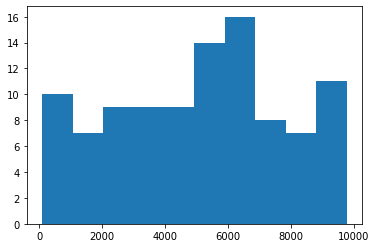

In [181]:
locs = []
for _ in range(100):
    seq = np.random.choice([0,1], size=10000)
    mask = np.random.choice([0,1], size=10000)
    loc = mask_based_lexicographic_first(seq,mask)
    locs.append(loc)
print(max(locs))
plt.hist(locs)